<a href="https://colab.research.google.com/github/Processamento-de-video-UFABC-2021-2/Processamento-de-video-UFABC-2021-2.github.io/blob/main/colab-notebooks/relatorio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math as Math
from google.colab.patches import cv2_imshow # cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


A função abaixo é utilizada para conversão da imagem original para `GRAY_SCALE`, ou seja, em preto e branco.

In [ ]:
def imagePB(fileName):
  # Caminho completo da imagem
  pathImage = '/content/drive/My Drive/processamento-de-video/' + fileName
  # Função 'imread' da biblioteca 'cv' para realizar a leitura da imagem à partir de seu arquivo, transformando para GRAY_SCALE
  return cv.imread(pathImage, cv.IMREAD_GRAYSCALE)

O objetivo dos códigos abaixo é obter o histograma referente à distribuição dos pixeis entre as extremidades da imagem e, com isso, realizar a equalização da mesma com diferentes metodologias, obtendo um novo histograma, no qual será possível identificar a diferença da distribuição dos pixeis.


Imagem original e seu histograma:

Imagem do grupo em Preto&Branco original


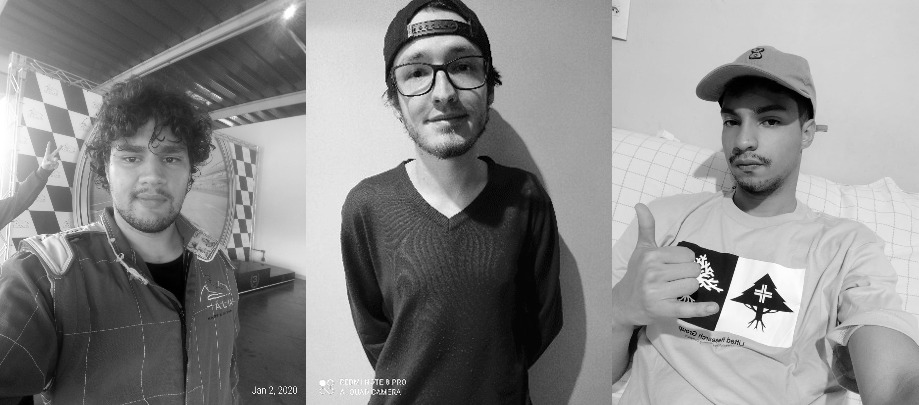

Histograma da imagem original


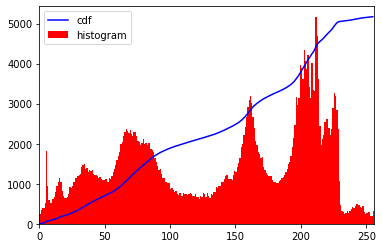

In [ ]:
# Retorna uma função de distribuição cumulativa (cdf) em seu estado original e normalizado (cdf_normalized), além do parâmetro de histograma
def imageCdf(img):
  hist,bins = np.histogram(img.flatten(),256,[0,256])
  cdf = hist.cumsum()
  cdf_normalized = cdf * float(hist.max()) / cdf.max()
  return cdf,cdf_normalized,hist

# Recebe os parâmetros de cdf e a imagem, a qual será enviada em preto e branco, retornando seu respectivo histograma
def imageHistogram(cdfParams, image):
  # Linha de CDF em cor azul ('b')
  plt.plot(cdfParams[1], color = 'b')
  # Cria o histograma à partir da imagem, o qual será disponibilizado em um gráfico de barras da cor vermelha ('r')
  plt.hist(image.flatten(),256,[0,256], color = 'r')
  plt.xlim([0,256])
  # Define as legendas (cdf e histograma) no canto superior esquerdo
  plt.legend(('cdf','histogram'), loc = 'upper left')
  # Disponibiliza a visualização do histograma
  plt.show()

# Imagem não equalizada
# Define a varíavel grupoPB a qual conterá a imagem do grupo em Preto&Branco
grupoPB = imagePB('grupo-rgb.jpg') 
# Visualização da imagem
print('Imagem do grupo em Preto&Branco original'); cv2_imshow(grupoPB) 
# Definindo parâmetros de distribuição cumulativa
grupoCdf = imageCdf(grupoPB)
# Visualização do histograma da imagem original
print('Histograma da imagem original'); imageHistogram(grupoCdf, grupoPB)

Obtenção de dados a partir da biblioteca NumPy

Imagem do grupo em Preto&Branco equalizada via NumPy


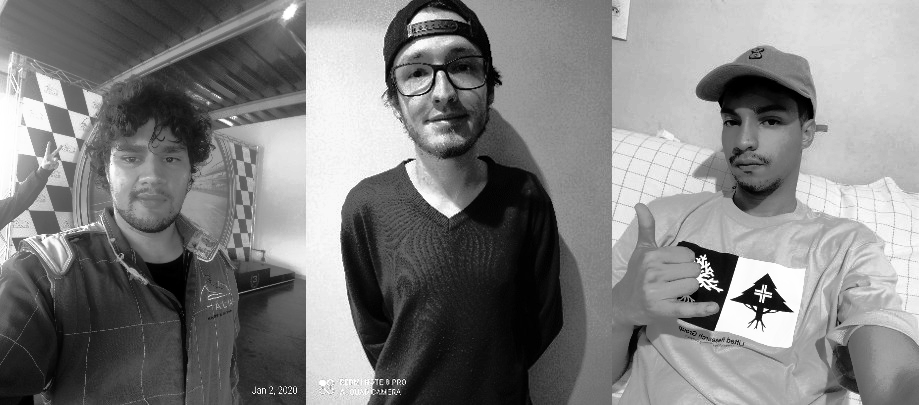

Histograma da imagem equalizada via NumPy


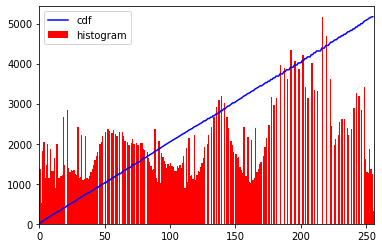

In [ ]:
# Equaliza a imagem a partir da biblioteca NumPy
def imageEquilizedNumPy(cdfParams, image):
  cdf_m = np.ma.masked_equal(cdfParams[0],0)
  cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
  cdf = np.ma.filled(cdf_m,0).astype('uint8')
  equalized = cdf[image]
  # Retorna a imagem equalizada
  return equalized

# Imagem equalizada
# Obtendo a imagem equalizada a partir de seus parâmetros originais de cdf
grupoEqualizedNumPy = imageEquilizedNumPy(grupoCdf, grupoPB)
# Visualização da imagem equalizada
print('Imagem do grupo em Preto&Branco equalizada via NumPy');cv2_imshow(grupoEqualizedNumPy)
# Definindo parâmetros de distribuição cumulativa para a imagem equalizada
grupoEqualizedCdfNumPy = imageCdf(grupoEqualizedNumPy)
# Visualização do histograma da imagem equalizada
print('Histograma da imagem equalizada via NumPy');imageHistogram(grupoEqualizedCdfNumPy, grupoEqualizedNumPy)

Obtenção de dados a partir da biblioteca OpenCV

Imagem do grupo em Preto&Branco equalizada via OpenCV


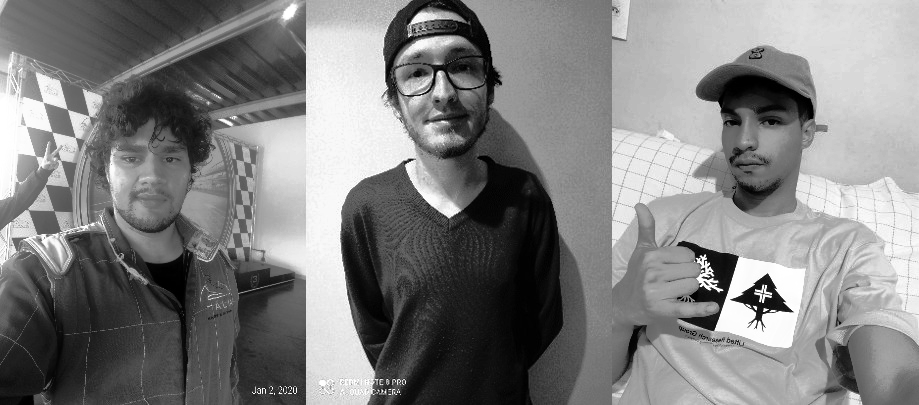

Histograma da imagem equalizada via OpenCV


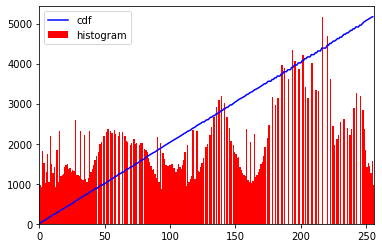

In [ ]:
# Equaliza a imagem a partir da biblioteca OpenCV
def imageEquilizedOpenCv(image):
  equalized = cv.equalizeHist(image)
  return equalized

# Imagem equalizada

# Visualização da imagem equalizada
grupoEqualizedOpenCv = imageEquilizedOpenCv(grupoPB)
print('Imagem do grupo em Preto&Branco equalizada via OpenCV'); cv2_imshow(grupoEqualizedOpenCv)
# Definindo parâmetros de distribuição cumulativa para a imagem equalizada
grupoEqualizedCdfOpenCv = imageCdf(grupoEqualizedOpenCv)
#Visualização do histograma da imagem equalizada
print('Histograma da imagem equalizada via OpenCV');imageHistogram(grupoEqualizedCdfOpenCv, grupoEqualizedOpenCv)

Obtenção de dados a partir do método CLAHE

Imagem do grupo em Preto&Branco equalizada via método CLAHE


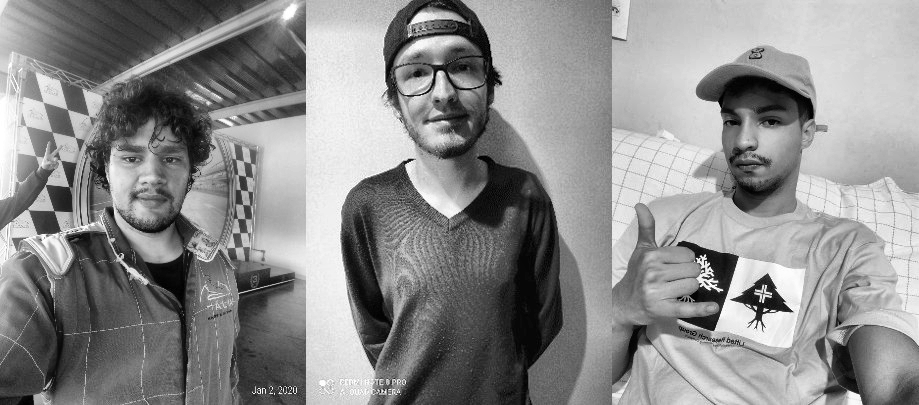

Histograma da imagem equalizada via método CLAHE


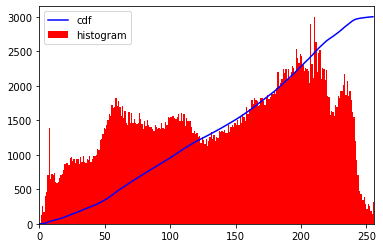

In [ ]:
# Equaliza a imagem a partir do método CLAHE (Contrast Limited Adaptive Histogram Equalization)
def imageEquilizedCLAHE(image):
  # create a CLAHE object (Arguments are optional).
  clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  claheEqualized = clahe.apply(image)
  return claheEqualized

# Imagem equalizada

# Visualização da imagem equalizada
grupoEqualizedCLAHE = imageEquilizedCLAHE(grupoPB)
print('Imagem do grupo em Preto&Branco equalizada via método CLAHE'); cv2_imshow(grupoEqualizedCLAHE)
# Definindo parâmetros de distribuição cumulativa para a imagem equalizada
grupoEqualizedCdfCLAHE = imageCdf(grupoEqualizedCLAHE)
#Visualização do histograma da imagem equalizada
print('Histograma da imagem equalizada via método CLAHE');imageHistogram(grupoEqualizedCdfCLAHE, grupoEqualizedCLAHE)

O objetivo do código abaixo é obter, diante de algumas metodologias que utilizam o algorítmo de _thresholding_, a segmentação de imagem, a partir de uma imagem em `GRAY_SCALE`. Isto é possivel pois o algorítmo analisa cada pixel da imagem, no qual se a intensidade do pixel for maior que o valor devido o mesmo passará a ser branco, caso contrário será preto.

Obtenção de dados a partir do método de threshold simples:



Imagem original


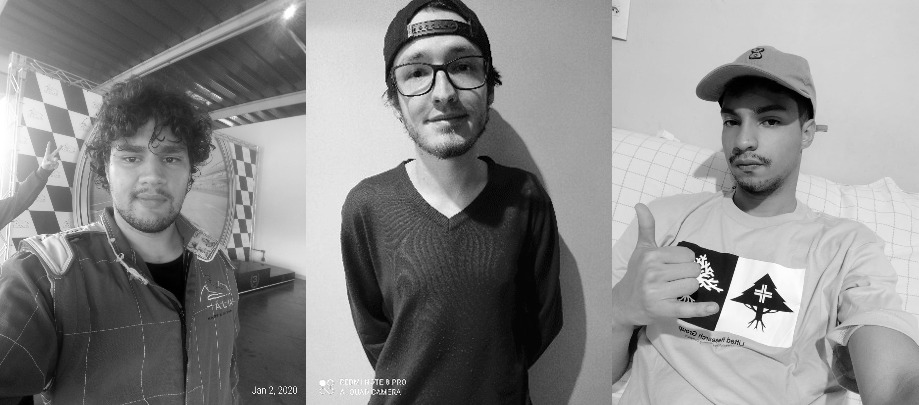

Binário


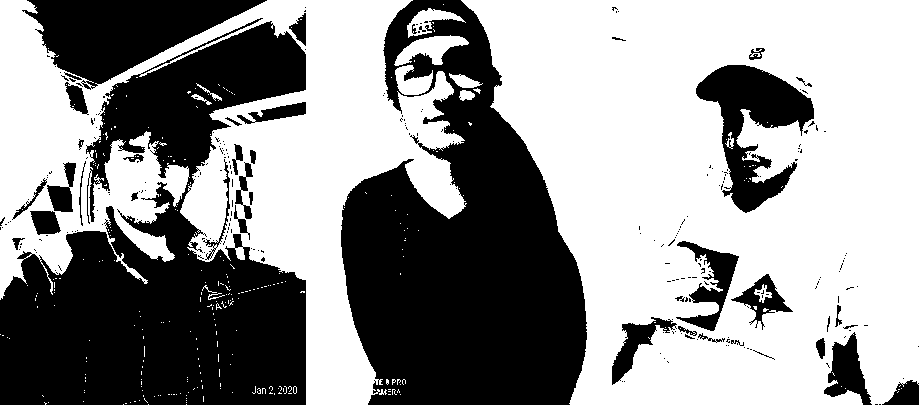

Binário invertido


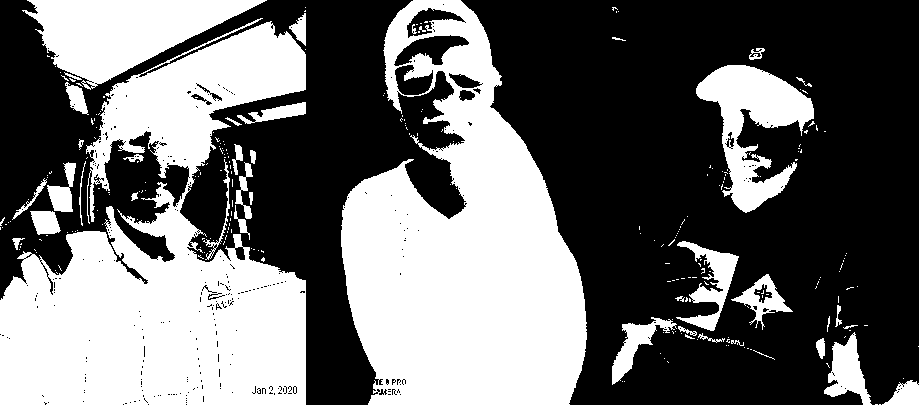

Truncado


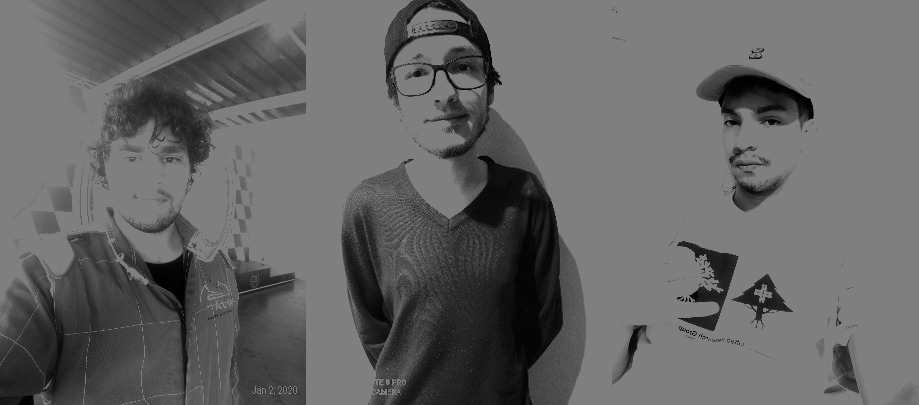

Ao zero


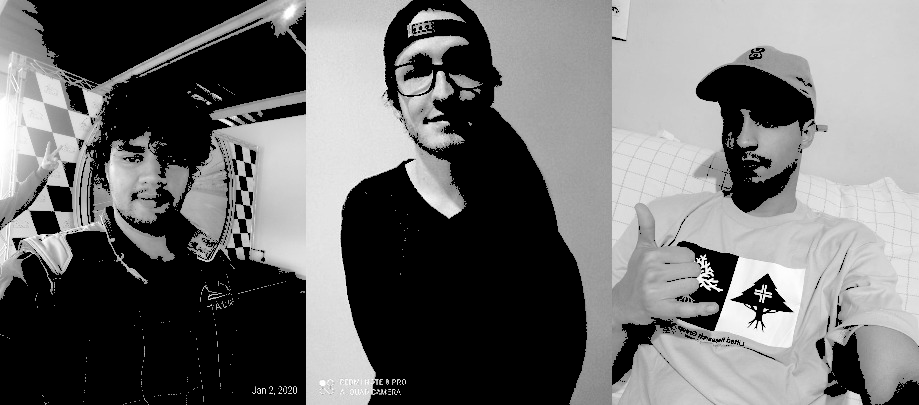

Ao zero invertido


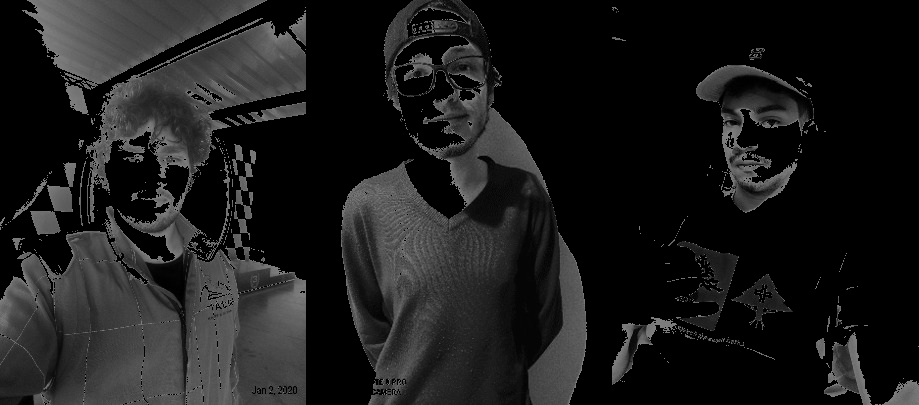

In [ ]:
# Definindo os vetores de imagem/título com os valores iniciais
thresholdingImages = [grupoPB]
thresholdingTitles = ['Imagem original']

# Função que utiliza o método "threshold" da biblioteca cv
def simpleThresholding(image, type, title):
  ret,threshold = cv.threshold(image,127,255, type)
  thresholdingImages.append(threshold)
  thresholdingTitles.append(title)
  
# Thresholds: 
simpleThresholding(grupoPB, cv.THRESH_BINARY, 'Binário') # Threshold Binário
simpleThresholding(grupoPB, cv.THRESH_BINARY_INV, 'Binário invertido') # Threshold Binário Invertido
simpleThresholding(grupoPB, cv.THRESH_TRUNC, 'Truncado') # Threshold Truncate
simpleThresholding(grupoPB, cv.THRESH_TOZERO, 'Ao zero') # Threshold To Zero
simpleThresholding(grupoPB, cv.THRESH_TOZERO_INV, 'Ao zero invertido') # Threshold To Zero Inverted

# Visualização dos thresholds
for thresholds in range(len(thresholdingImages)):
    print(thresholdingTitles[thresholds])
    cv2_imshow(thresholdingImages[thresholds])


Obtenção de dados a partir do método de threshold adaptativo:



Adaptive Mean Thresholding


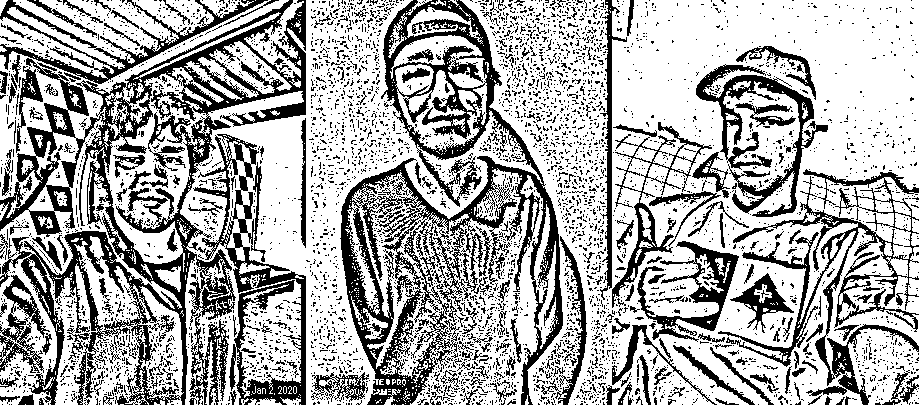

Adaptive Gaussian Thresholding


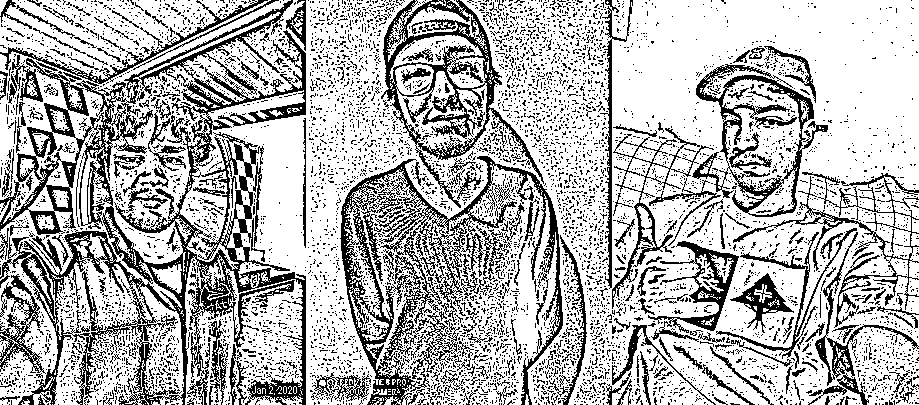

In [ ]:
# Definindo os vetores de imagem/título com os valores iniciais
adaptativeThresholdingImages = []
adaptativeThresholdingTitles = []

# Função que utiliza o método "adaptiveThreshold" da biblioteca cv
def adaptativeThresholding(image, type, title):
  threshold = cv.adaptiveThreshold(image,255,type,cv.THRESH_BINARY,11,2)
  adaptativeThresholdingImages.append(threshold)
  adaptativeThresholdingTitles.append(title)

adaptativeThresholding(grupoPB, cv.ADAPTIVE_THRESH_MEAN_C, 'Adaptive Mean Thresholding') # Adaptive Mean Thresholding
adaptativeThresholding(grupoPB, cv.ADAPTIVE_THRESH_GAUSSIAN_C, 'Adaptive Gaussian Thresholding') #'Adaptive Gaussian Thresholding'

# Visualização dos thresholds adaptativos
for thresholds in range(len(adaptativeThresholdingImages)):
    print(adaptativeThresholdingTitles[thresholds])
    cv2_imshow(adaptativeThresholdingImages[thresholds])

Obtenção de dados a partir do método de binarização otsu:



Original Noisy Image


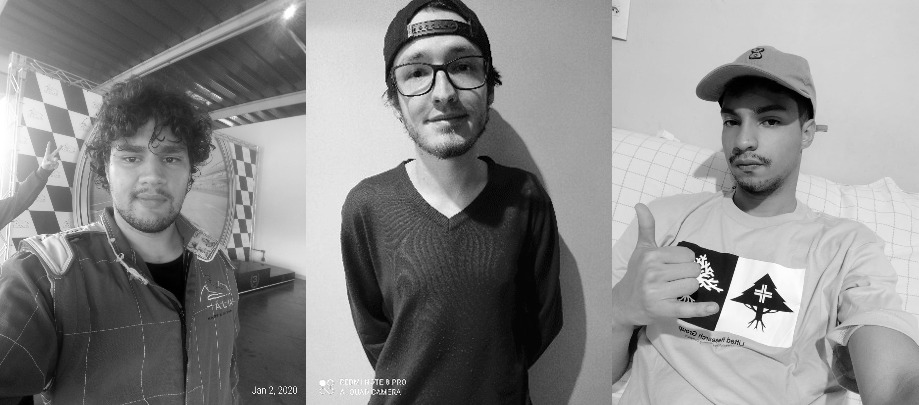

Histogram


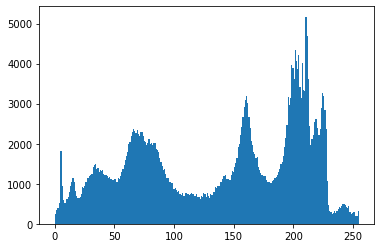

Global Thresholding (v=127)


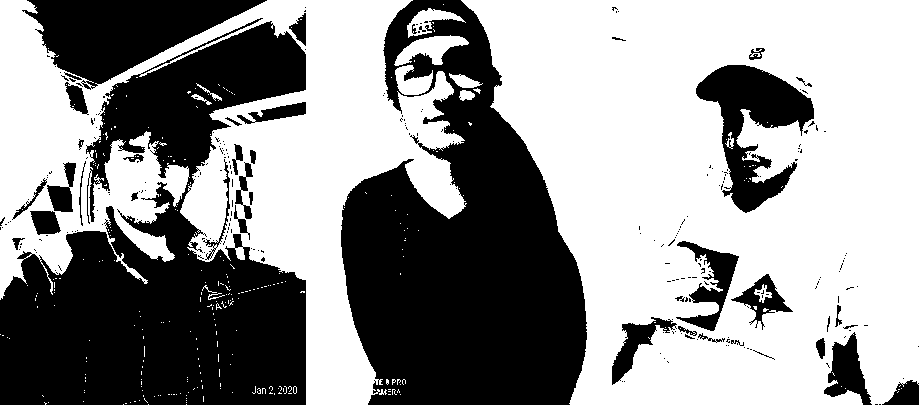

Original Noisy Image


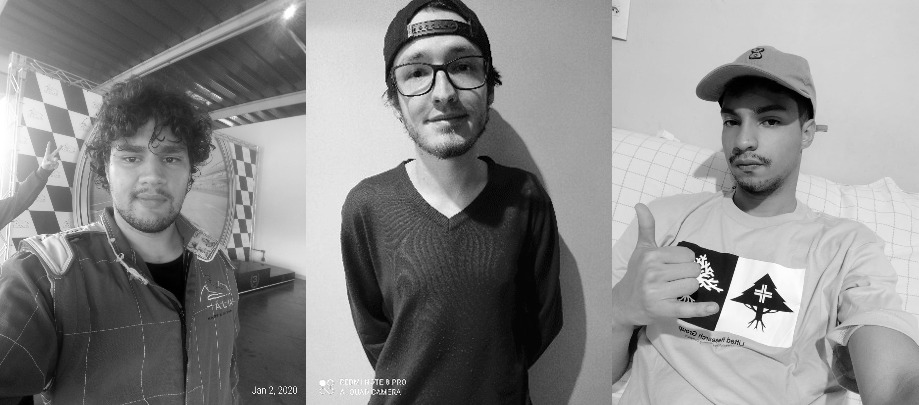

Histograma


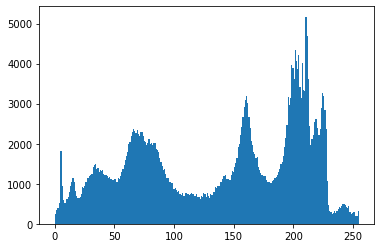

Otsu's Thresholding


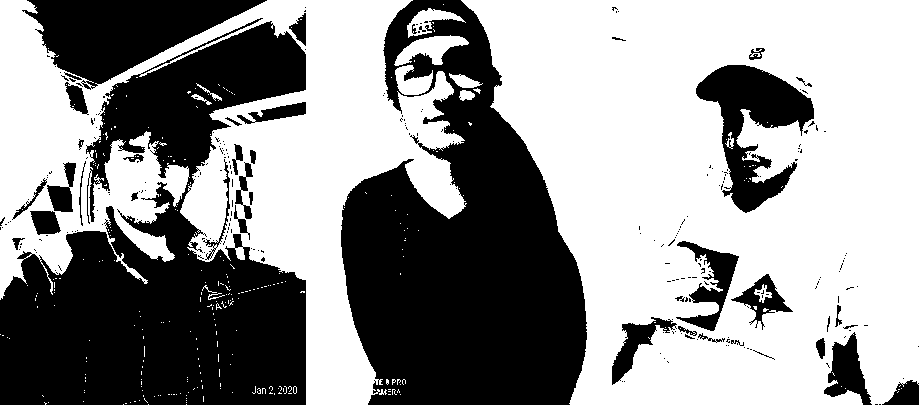

Gaussian filtered Image


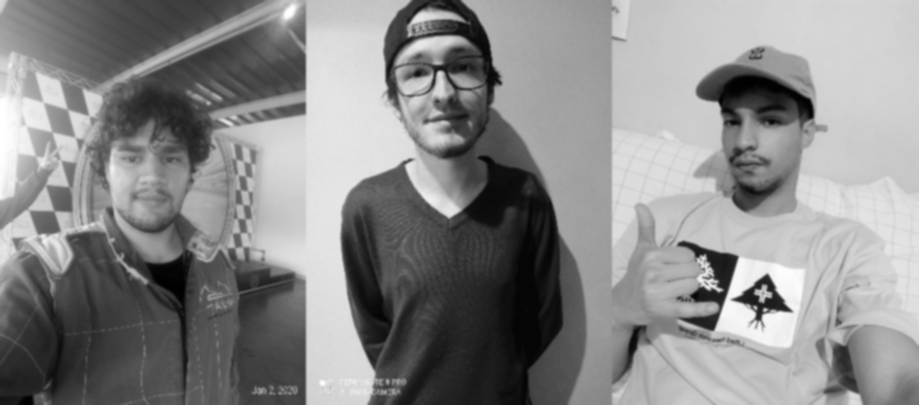

Histograma


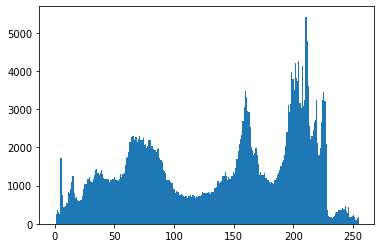

Otsu's Thresholding


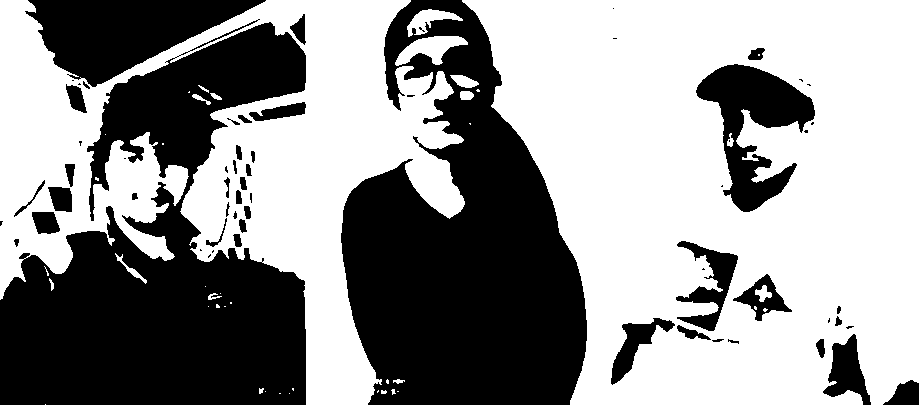

In [ ]:
# Definindo os vetores de imagem/título com os valores iniciais
ret1,th1 = cv.threshold(grupoPB,127,255,cv.THRESH_BINARY)
otsuThresholdingImages = [grupoPB, 0, th1]
otsuThresholdingTitles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)']

# Função que utiliza o método "adaptiveThreshold" da biblioteca cv
def otsuThresholding(image, title):
  ret,th = cv.threshold(image,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
  otsuThresholdingImages.append(image);otsuThresholdingImages.append(0);otsuThresholdingImages.append(th);
  otsuThresholdingTitles.append(title);otsuThresholdingTitles.append("Histograma");otsuThresholdingTitles.append("Otsu's Thresholding");

otsuThresholding(grupoPB, 'Original Noisy Image') # Otsu's thresholding - Original Noisy Image
blur = cv.GaussianBlur(grupoPB,(5,5),0)
otsuThresholding(blur, 'Gaussian filtered Image') # Otsu's thresholding after Gaussian filtering

# Visualização dos thresholds adaptativos
for thresholds in range(3):
    print(otsuThresholdingTitles[thresholds*3])
    cv2_imshow(otsuThresholdingImages[thresholds*3])
    print(otsuThresholdingTitles[thresholds*3+1])
    plt.hist(otsuThresholdingImages[thresholds*3].ravel(),256)
    plt.show()
    print(otsuThresholdingTitles[thresholds*3+2])
    cv2_imshow(otsuThresholdingImages[thresholds*3+2])
